### 1. For the boston dataset given in HW2, create a heatmap with all the features - 1 point

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


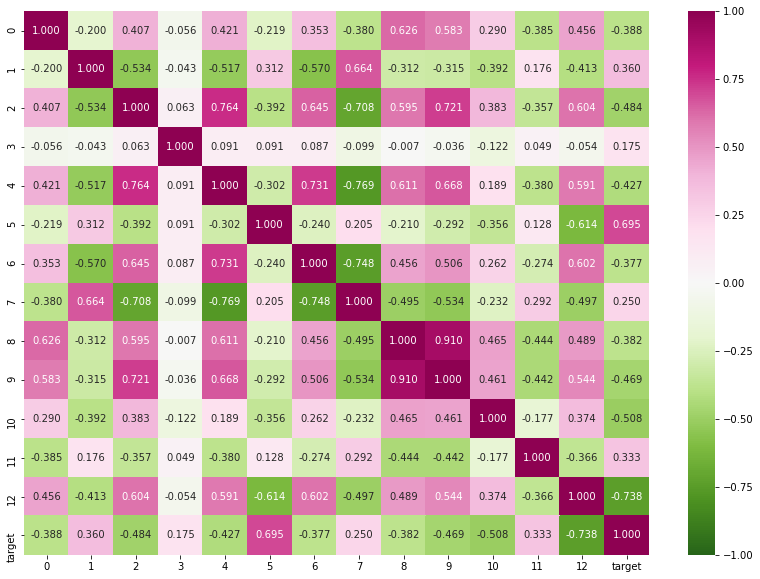

In [29]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sbn
import pandas as pd
from sklearn import datasets, linear_model

boston_X, boston_y = datasets.load_boston(return_X_y=True)

df_boston_X = pd.DataFrame(boston_X)
df_boston_y = pd.DataFrame({'target': boston_y})
boston_X_y = pd.concat([df_boston_X, df_boston_y], axis=1)

print(boston_X)


corrs = boston_X_y.corr()
plt.figure(figsize = (14, 10))
sbn.heatmap(corrs, annot = True, vmin = -1, vmax = 1, fmt = '.3f', cmap=plt.cm.PiYG_r);

### 2. Apply feature selection on the dataset. Try to find the top k features which improves the score in the next questions - 1 point each

In [31]:
from sklearn.feature_selection import SelectKBest, f_regression
'''
chi2: Chi-squared stats of non-negative features for classification tasks.
f_regression: F-value between label/feature for regression tasks.

Based on heatmap, I am going to assume that unpper |0.4| correlation would influence on target and put number 6 as K.
index2(corr:-0.484) index4(corr:-0.427) index5(corr:0.695) index9(corr:-0.469) index10(corr:-0.508) index12(corr:-0.738)
'''

selecter = SelectKBest(score_func=f_regression, k=6)
boston_X_new = selecter.fit_transform(boston_X, boston_y)
mask = selecter.get_support()
print(mask)


[False False  True False  True  True False False False  True  True False
  True]


### 3. Apply Linear regression and Ridge regression and plot the coefficient for each feature. Try different aplha values as well and comment what do you observe. -3 points

Use different marker for each model if plotting in same figure.

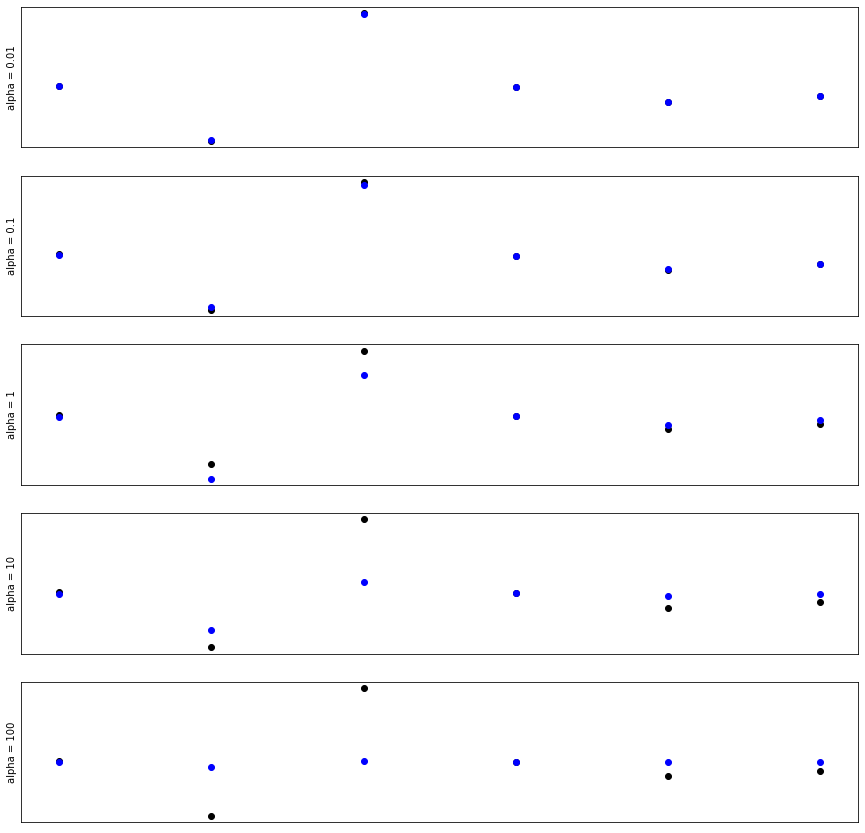

"\n alpha between 0.01 and 0.1 looks like very small different.\n Based on alpha's changes from 1 to 10, 100, weights have been changed.\n Especially, when alpha is 100, all weights converge similar value.\n"

In [35]:
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score

#apply linear regression
lin_regr = LinearRegression()
lin_regr.fit(boston_X_new, boston_y)
nf = boston_X_new.shape[1]

fig, axes = plt.subplots(5, 1, figsize=(15,15)) 

for i, (A, axes_row) in enumerate(zip((0.01, 0.1, 1, 10, 100), axes)):
    
    #apply ridge regression
    ridge_regr = Ridge(alpha = A, normalize = True, tol = 0.01, solver ='auto', random_state = 42)
    ridge_regr.fit(boston_X_new, boston_y)
    
    #plot the coefficient for each feature
    axes_row.scatter(x=range(nf), y=lin_regr.coef_, color='black')
    axes_row.scatter(x=range(nf), y=ridge_regr.coef_, color='b')
    axes_row.set_xticks(())
    axes_row.set_yticks(())

    axes_row.set_ylabel('alpha = %s' % A)

plt.show()

#observation
'''
 alpha between 0.01 and 0.1 looks like very small different.
 Based on alpha's changes from 1 to 10, 100, weights have been changed.
 Especially, when alpha is 100, all weights converge similar value.
'''

### 4. Use the HCC.csv file. Split the data into 70:30. Apply Ridge and lasso regression on the data to predict alive or dead. -5 points

In this question you are expected to figure out the difference between the two regularization technique as well as when to use which. Comment your findings. Try plotting coefficents as well for better understanding.

C=1.00
Sparsity with L1 penalty:                20.51%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.68
Score with L2 penalty:                   0.68
C=0.90
Sparsity with L1 penalty:                23.08%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.68
Score with L2 penalty:                   0.68
C=0.80
Sparsity with L1 penalty:                23.08%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.68
Score with L2 penalty:                   0.68
C=0.70
Sparsity with L1 penalty:                30.77%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.68
Score with L2 penalty:                   0.68
C=0.60
Sparsity with L1 penalty:                38.46%
Sparsity with L2 penalty:                0.00%
Score with L1 penalty:                   0.66
Score with L2 penalty:                   0.68
C=0.10
Sparsity with L1 penalt

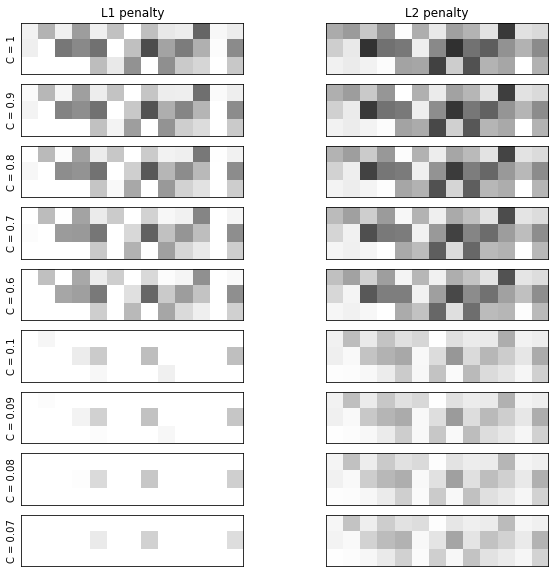

LogisticRegression() accuracy_score: 
0.6808510638297872
1 index, column name 2.Sym < 0
16 index, column name 21.Thr < 0
17 index, column name 22.LMet < 0
20 index, column name 27.Sta < 0
25 index, column name  32.Hae < 0
30 index, column name 37.Bil < 0
34 index, column name 41.Alk < 0


'\nI understand that the difference between ridge and lasso regression is that it tends to make coefficients \nto absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero. \n\n1) L1(Lasso)\nwhen C = 0.09, L1 has the best score(0.7) and sparsity is 82.05%.\nWhich means that only 17.95% of the total features has significantly contributed to predict target.\n2) L2(Ridge)\nwhen C = 0.09,0.6,0.7,0.8,0.9,1.0, L2 has the best score(0.68).\n\n3) Both L1 and L2\nBased on findings when C = 0.09 both L1 and L2 have the best score, \nsome weights are eliminated by L1 penalty, but not eliminated and instead reduced by L2 penalty. \nThis means some of features have impact on the target.\n\nThe red dots(RidgeRegression) are all reduced rather than green dots(LogisticRegression) so \nthe tendency to be sensitive to outliers is reduced rather than that of Logistic Regression(Regularization).\n\nAccording to blue dots(RassoRegression),  many indexes goes zero except 

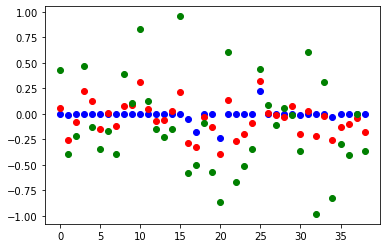

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
import seaborn as sns

#use HCC.csv file
df = pd.read_csv('HCC.csv')
df_x = df.iloc[:,1:-1]
df_x = StandardScaler().fit_transform(df_x)
df_y = df.iloc[:,-1:]

#split data 70:30
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.3, random_state=1)

#apply ridge and lasso regression
fig, axes = plt.subplots(9, 2, figsize=(10,10))

for i, (C, axes_row) in enumerate(zip((1, 0.9, 0.8,0.7,0.6, 0.1,0.09, 0.08,0.07), axes)):

    clf_l1_LR = LogisticRegression(C=C, penalty='l1', tol=0.01, solver='saga', random_state=42) #lasso
    clf_l2_LR = LogisticRegression(C=C, penalty='l2', tol=0.01, solver='saga', random_state=42)  #Ridge 
    
    clf_l1_LR.fit(X_train, y_train.values.ravel())
    clf_l2_LR.fit(X_train, y_train.values.ravel())
    
    coef_l1_LR = clf_l1_LR.coef_.ravel()
    coef_l2_LR = clf_l2_LR.coef_.ravel()
    
    if C == 0.09 :
        c009_coef_l1_LR = coef_l1_LR
        c009_coef_l2_LR = coef_l2_LR

    # coef_l1_LR contains zeros due to the L1 sparsity inducing norm
    sparsity_l1_LR = np.mean(coef_l1_LR == 0) * 100
    sparsity_l2_LR = np.mean(coef_l2_LR == 0) * 100 

    print("C=%.2f" % C)
    print("{:<40} {:.2f}%".format("Sparsity with L1 penalty:", sparsity_l1_LR))
    print("{:<40} {:.2f}%".format("Sparsity with L2 penalty:", sparsity_l2_LR))
    
    #l1_y_pred = clf_l1_LR.predict(X_test)
    #l2_y_pred = clf_l2_LR.predict(X_test)
    print("{:<40} {:.2f}".format("Score with L1 penalty:", clf_l1_LR.score(X_test, y_test)))  #lasso score
    print("{:<40} {:.2f}".format("Score with L2 penalty:",clf_l2_LR.score(X_test, y_test)))   #ridge score

    if i == 0:
        axes_row[0].set_title("L1 penalty") 
        axes_row[1].set_title("L2 penalty")

    for ax, coefs in zip(axes_row, [coef_l1_LR, coef_l2_LR]):
        ax.imshow(np.abs(coefs.reshape(3, 13)), interpolation='nearest', cmap='binary', vmax=1, vmin=0)
        ax.set_xticks(())
        ax.set_yticks(())

    axes_row[0].set_ylabel('C = %s' % C)

plt.show()


#logistic regression to compare lasso and ridge
basic_model = LogisticRegression()
basic_model.fit(X_train, y_train.values.ravel())
y_pred = basic_model.predict(X_test)
print("LogisticRegression() accuracy_score: ")
print(accuracy_score(y_test, y_pred)) # 0.68


# when C=0.09, coefficients 
plt.scatter(x=range(39), y=c009_coef_l1_LR, color='b') 
plt.scatter(x=range(39), y=c009_coef_l2_LR, color='r')
plt.scatter(x=range(39), y=basic_model.coef_, color='g')

for i in range(39) :
    if c009_coef_l1_LR[i] != 0 :
        print("{0} index, column name {1} < 0".format(i, df.columns.values[i+1]))


'''
I understand that the difference between ridge and lasso regression is that it tends to make coefficients 
to absolute zero as compared to Ridge which never sets the value of coefficient to absolute zero. 

1) L1(Lasso)
when C = 0.09, L1 has the best score(0.7) and sparsity is 82.05%.
Which means that only 17.95% of the total features has significantly contributed to predict target.
2) L2(Ridge)
when C = 0.09,0.6,0.7,0.8,0.9,1.0, L2 has the best score(0.68).

3) Both L1 and L2
Based on findings when C = 0.09 both L1 and L2 have the best score, 
some weights are eliminated by L1 penalty, but not eliminated and instead reduced by L2 penalty. 
This means some of features have impact on the target.

The red dots(RidgeRegression) are all reduced rather than green dots(LogisticRegression) so 
the tendency to be sensitive to outliers is reduced rather than that of Logistic Regression(Regularization).

According to blue dots(RassoRegression),  many indexes goes zero except index1(2.Sym), index16(21.Thr), index17(22.LMet), index20(27.Sta)
index30(37.Bil), index34(41.Alk), index25(32.Hae). Those non-zero features would most likely influence to predict target.

'''    